In [1]:
import pandas as pd #used for importing
import math as m 
import numpy as np #used for matrix manipulation
from scipy.interpolate import interp2d #used for interpolating Perple_X outputs
from scipy.interpolate import interp1d #used for interpolating evenly spaced P-T conditions from modeling
import colorcet as cc
#import cmcrameri.cm as cmc
import matplotlib.pyplot as plt #plotting package
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap #used for defining user-created colormap
import matplotlib.colors as col

In [2]:
wedge_mat=np.zeros((6,600,225,100))
slab_mat=np.empty((2,600,100))
slab_mat[:]=np.nan
wedge_field='wedge_PT_4e20/text_files/{}.wedgeT.txt'
slabtop='wedge_PT_4e20/text_files/{}.slabtop.txt'

In [3]:
#load grid data for wedge PT
for i in range(0,100):
    wedge=pd.read_csv(wedge_field.format(i),header=None, delim_whitespace=True)
    slab=pd.read_csv(slabtop.format(i),header=None, delim_whitespace=True)
    
    wedge=wedge.to_numpy()
    slab=slab.to_numpy()
    
    wedge=np.flipud(wedge)
    slab=np.flipud(slab)
    
    X=np.reshape(wedge[:,0],(225,600))
    Y=np.reshape(wedge[:,1],(225,600))
    T=np.reshape(wedge[:,2],(225,600))
    
    X=np.fliplr(X)
    Y=np.fliplr(Y)
    T=np.fliplr(T)
    
    wedge_mat[0,:,:,i]=X.T
    wedge_mat[1,:,:,i]=Y.T
    wedge_mat[2,:,:,i]=T.T
    
    lng=slab.shape[0]
    slab_mat[:,0:lng,i]=slab[:,:].T
    

In [4]:
wedge_mat[3,:,:,:]=wedge_mat[1,:,:,:]*.03234 #convert depth to pressure

In [5]:
adiabat=0.3*wedge_mat[1,:,:,:] #add adiabatic temperature gradient

In [6]:
wedge_mat[2,:,:,:]=wedge_mat[2,:,:,:]+adiabat

Text(0.5, 0, 'Temperature (°C)')

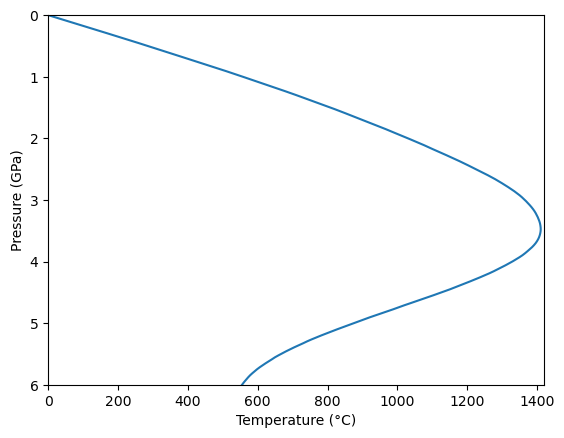

In [7]:
#test plot of temperature through forearc and into slab
plt.plot(wedge_mat[2,250,:,85],wedge_mat[3,250,:,85])
plt.ylim(6,0)
plt.xlim(0,1420)
plt.ylabel('Pressure (GPa)')
plt.xlabel('Temperature (\u00b0C)')
#plt.savefig('subarc_PT.png')

In [8]:
print(wedge_mat[2,250,43:135,85])

[ 757.7706  773.4588  789.1383  804.9035  820.537   835.6782  850.3427
  864.9689  879.6924  894.6476  909.4831  924.0973  938.6378  953.174
  966.7782  980.1407  994.2579 1008.2914 1022.1056 1035.8611 1049.4473
 1063.0608 1076.222  1088.5435 1101.3667 1114.5302 1127.3844 1140.1616
 1152.8351 1165.3663 1177.7858 1189.829  1201.5085 1212.9717 1224.4842
 1236.0424 1247.5019 1258.6891 1269.5186 1279.8778 1289.7173 1299.1905
 1308.4097 1317.4072 1326.1104 1334.4199 1342.2211 1349.5416 1356.2438
 1362.4413 1368.2925 1373.8    1379.0112 1383.9287 1388.4149 1392.4164
 1395.9156 1399.0098 1401.7563 1404.1745 1406.295  1407.9772 1409.1097
 1409.8769 1410.1954 1409.8306 1408.8801 1407.4213 1405.4468 1402.774
 1399.4452 1395.4467 1390.6549 1385.1414 1378.7916 1372.1671 1365.3333
 1357.8408 1349.252  1340.0555 1330.3577 1320.1532 1309.5494 1298.2376
 1286.8031 1275.5963 1263.3708 1250.265  1236.8945 1223.1057 1208.9932
 1194.4544]


Text(6870, 30, '35.9 Myr')

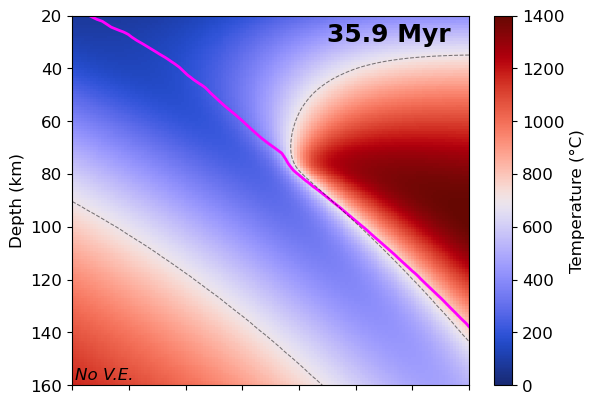

In [9]:
#plot cross section of thermal state
plt.rcParams.update({'font.size': 12})

fluxmap = pd.read_csv("fluxmap.cpt", header=None)
fluxmap=fluxmap.to_numpy()
fluxmap_2=np.zeros((64,4))
fluxmap_2[:,0:3]=fluxmap[:,0:3]
fluxmap_2[:,3]=1

norm_temp=plt.Normalize(0,1400)
cmap=cm.get_cmap('cet_diverging_bwr_20_95_c54')
#cmap=cmc.roma_r

plt.pcolormesh(wedge_mat[0,:,:,67],wedge_mat[1,:,:,67],wedge_mat[2,:,:,67],cmap=cmap,norm=norm_temp)
plt.plot(slab_mat[0,:,67],slab_mat[1,:,67],c='magenta',lw=2)
plt.colorbar(label='Temperature (\u00b0C)')
CS=plt.contour(wedge_mat[0,:,:,67],wedge_mat[1,:,:,67],wedge_mat[2,:,:,67], levels=[700],colors='black',linewidths=0.75,linestyles='--',alpha=0.5)
CL=plt.clabel(CS)
plt.ylim(160,20)
plt.xlim(6780,6920)
plt.ylabel('Depth (km)')
plt.xticks(color='w')
plt.text(6781,158,'No V.E.',style='italic')
plt.text(6870,30,'35.9 Myr',fontsize=18,fontweight='bold')
#plt.savefig('wedge_PT/figures/35.9Myr_700_4e20.pdf')

Text(7375, 30, '7.0 Myr')

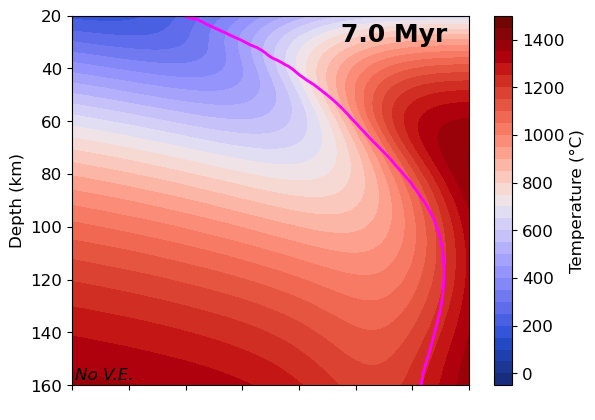

In [10]:
plt.rcParams.update({'font.size': 12})

fluxmap = pd.read_csv("fluxmap.cpt", header=None)
fluxmap=fluxmap.to_numpy()
fluxmap_2=np.zeros((64,4))
fluxmap_2[:,0:3]=fluxmap[:,0:3]
fluxmap_2[:,3]=1

norm_temp=plt.Normalize(0,1450)
cmap=cm.get_cmap('cet_diverging_bwr_20_95_c54')

plt.contourf(wedge_mat[0,:,:,8],wedge_mat[1,:,:,8],wedge_mat[2,:,:,8],cmap=cmap,levels=30)
plt.plot(slab_mat[0,:,8],slab_mat[1,:,8],c='magenta',lw=2)
plt.ylim(160,20)
plt.xlim(7280,7420)
plt.ylabel('Depth (km)')
plt.xticks(color='w')
plt.colorbar(label='Temperature (\u00b0C)')
plt.text(7281,158,'No V.E.',style='italic')
plt.text(7375,30,'7.0 Myr',fontsize=18,fontweight='bold')
#plt.savefig('wedge_PT/figures/5.6Myr.png')

In [11]:
#readin H2O and density from perplex
b_h2o=pd.read_csv('wedge_PT/niu_perid_h2o_rho.tab', delim_whitespace=True)
b_h2o=b_h2o.to_numpy()

Tppx=b_h2o[:,0]
Pppx=b_h2o[:,1]
h2o=b_h2o[:,2]
rho=b_h2o[:,3]

Tppx=Tppx.reshape(250,250)
Pppx=Pppx.reshape(250,250)
h2o=h2o.reshape(250,250)
rho=rho.reshape(250,250)

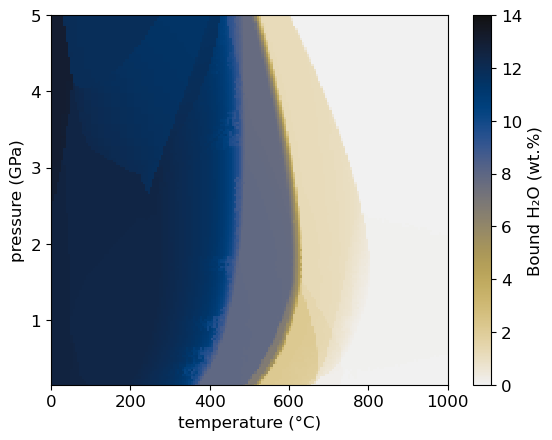

In [13]:
#plot water content in PT space
plt.rcParams.update({'font.size': 12})
cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r')
norm=plt.Normalize(0,14)
plt.pcolormesh(Tppx-273,Pppx/10000,h2o,cmap=cmap,norm=norm)
plt.xlabel('temperature (\u00b0C)')
plt.ylabel('pressure (GPa)')
plt.colorbar(label='Bound H\u2082O (wt.%)')
plt.ylim(0.15,5)
plt.xlim(0,1000)
#plt.savefig('wedge_PT/figures/serp_h2o_content.pdf')
plt.show()

In [14]:
#setup interpolation
F_h2o=interp2d(Tppx[0,:],Pppx[:,0],h2o)
F_rho=interp2d(Tppx[0,:],Pppx[:,0],rho)

In [15]:
#interpolate from perplex grid to thrmal state; takes a few minutes
for i in range(0,100):
    for j in range (0,600):
        for k in range (0,225):
            wedge_mat[4,j,k,i]=F_h2o(wedge_mat[2,j,k,i]+273.15,wedge_mat[3,j,k,i]*10000)
            wedge_mat[5,j,k,i]=F_rho(wedge_mat[2,j,k,i]+273.15,wedge_mat[3,j,k,i]*10000)

In [16]:
#constrain wedge extents: above slab depth of 30 to 120 km, cutoff backarc
fluid_mat=np.zeros((2,600,225,100))
for i in range(0,100):
    for j in range(30,120):
        beg_i=np.where(slab_mat[1,:,i]>=wedge_mat[1,0,j,i])[0][0]
        end_i=np.where(slab_mat[1,:,i]>=100)[0][0]
        k1=np.where(wedge_mat[0,:,j,i]>=slab_mat[0,beg_i,i])[0][0]
        k2=np.where(wedge_mat[0,:,j,i]>=slab_mat[0,end_i,i])[0][0]
        for k in range(k1,k2+1):
            if wedge_mat[4,k,j,i]>0.1:
                fluid_mat[0,k,j,i]=wedge_mat[4,k,j,i]/100*wedge_mat[5,k,j,i]*10**6
                fluid_mat[1,k,j,i]=1

In [17]:
##optional calculation of seismic parameters
##Vp calculation
#wedge_mat[5,:,:,:]=(wedge_mat[4,:,:,:]-30)/-3.7*(1000*wedge_mat[3,:,:,:]/200)**0.015+wedge_mat[2,:,:,:]*-0.0006

In [18]:
#calculate capacity through time (Tg/m)
capacity=np.zeros((100,1))
for i in range(0,100):
    capacity[i,0]=np.sum(fluid_mat[0,:,:,i])/1e9

In [19]:
#np.savetxt('wedge_PT_4e20/forearc_h2o_capacity.txt',capacity) #save h2o capacity as function of time (Tg/m)

In [21]:
age=pd.read_csv('holt4e20/age_convergence.txt', header=None, usecols=[1], delim_whitespace=True)
age=age.to_numpy()
convergence=pd.read_csv('holt4e20/age_convergence.txt', header=None, usecols=[2], delim_whitespace=True)
convergence=convergence.to_numpy()

(0.0, 525.0)

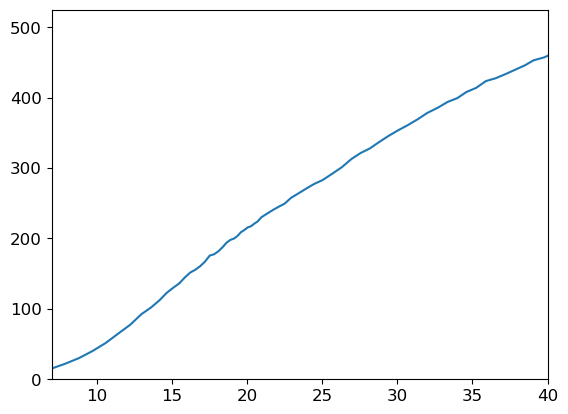

In [22]:
#plot H2O capacity through time
plt.rcParams.update({'font.size': 12})
plt.plot(age[0:100],capacity)
plt.xlim(7,40)
plt.ylim(0,525)
#plt.savefig('4e20_h2o_capacity.pdf')

(array([6780., 6800., 6820., 6840., 6860., 6880., 6900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

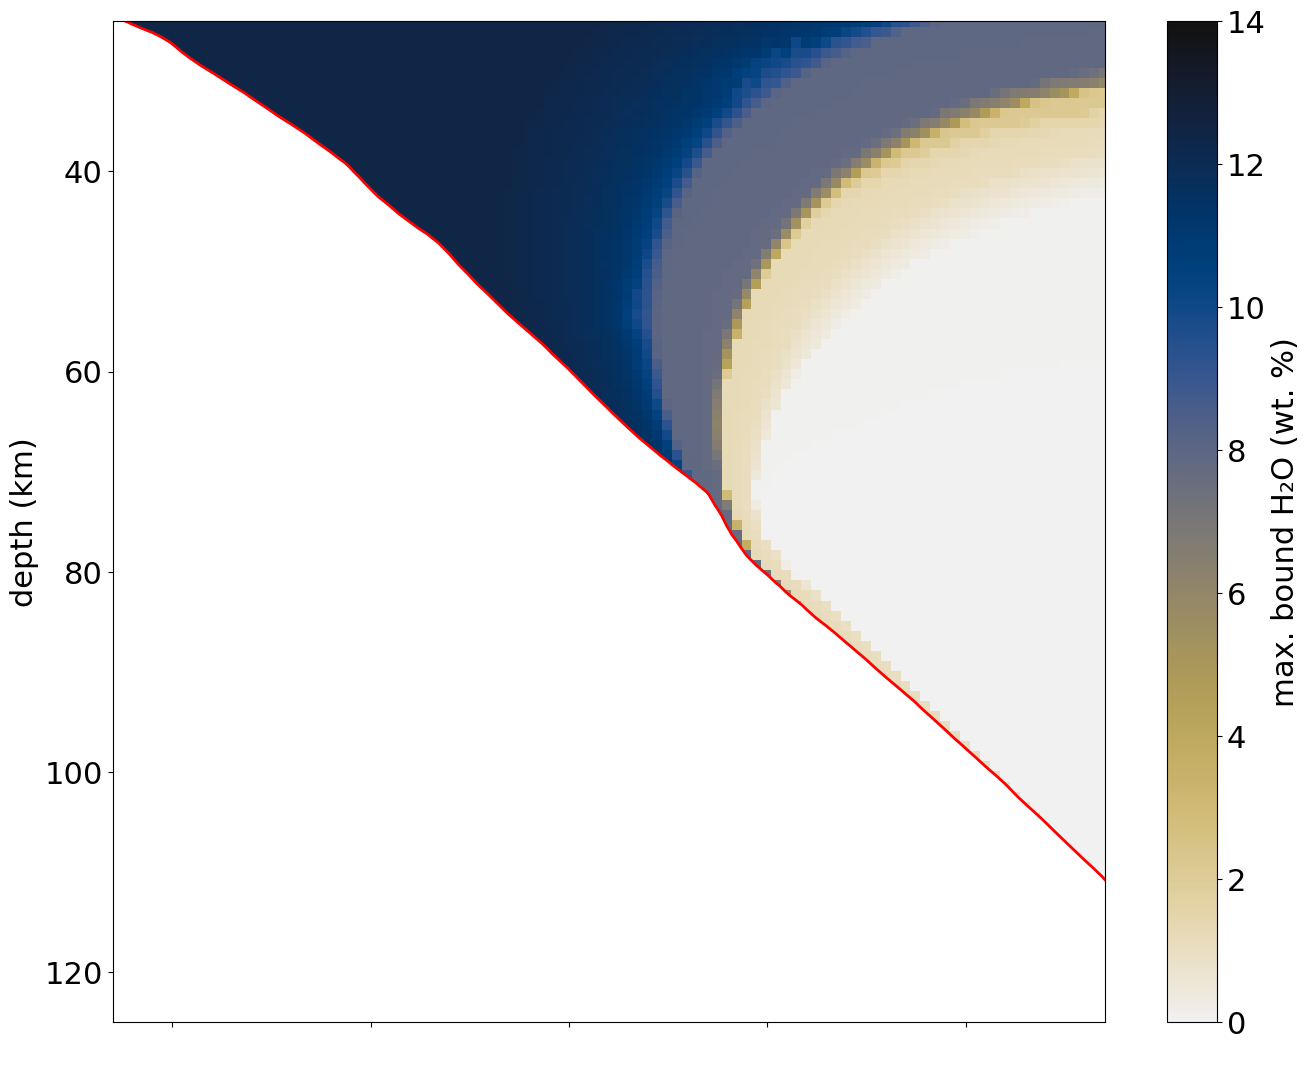

In [24]:
#plot cross section of H2O capacity at given timestep

ageind=67
from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
plt.subplots(figsize=[16,13]) 


min_ind=np.where(slab_mat[1,:,ageind]>=25)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+100

cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r')
norm=plt.Normalize(0,14) 

plt.pcolormesh(wedge_mat[0,:,:,ageind],wedge_mat[1,:,:,ageind],wedge_mat[4,:,:,ageind],cmap=cmap,norm=norm)
plt.colorbar(label='max. bound H\u2082O (wt. %)')
plt.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='red',lw=2)
#plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],slab_mat[1,:,ageind]+1,color='red')
plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],125,color='white')
plt.ylim(125,25)
plt.xlim(xstart,xend)
plt.ylabel('depth (km)')
plt.xticks(color='w')
#plt.xlabel('distance from model edge (km)')
#plt.suptitle('Model Age = 32.1 Myr')
#plt.savefig('forearc_h2o_max_35.9myr.pdf')

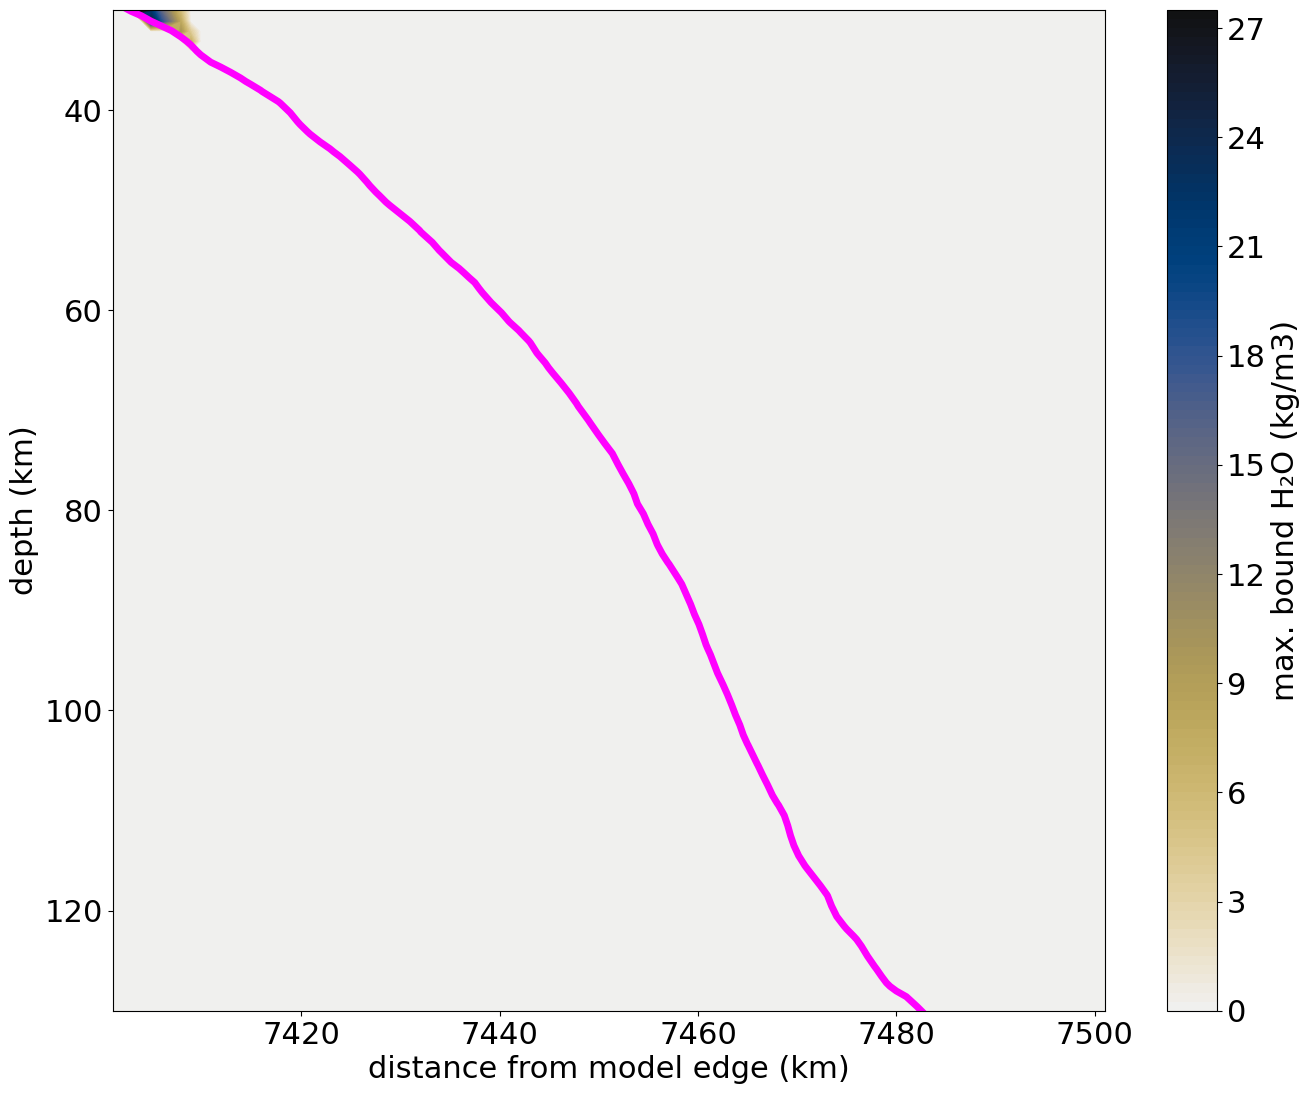

In [26]:
ageind=2
from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
plt.subplots(figsize=[16,13]) 


min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+100

cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r')
cmap_rev=cmap.reversed() 
norm=plt.Normalize(0,350) 

plt.contourf(wedge_mat[0,:,:,ageind],wedge_mat[1,:,:,ageind],fluid_mat[0,:,:,ageind]/10**6,cmap=cmap,levels=128)
plt.colorbar(label='max. bound H\u2082O (kg/m3)')
plt.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=5)
#plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],slab_mat[1,:,ageind]+1,color='red')
#plt.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind]+1,175,color='white')
plt.ylim(130,30)
plt.xlim(xstart,xend)
plt.ylabel('depth (km)')
plt.xlabel('distance from model edge (km)')
#plt.suptitle('Model Age = 32.1 Myr')
plt.show()
#plt.savefig('wedge_PT/forearc_h2o_max_32.1myr.png')

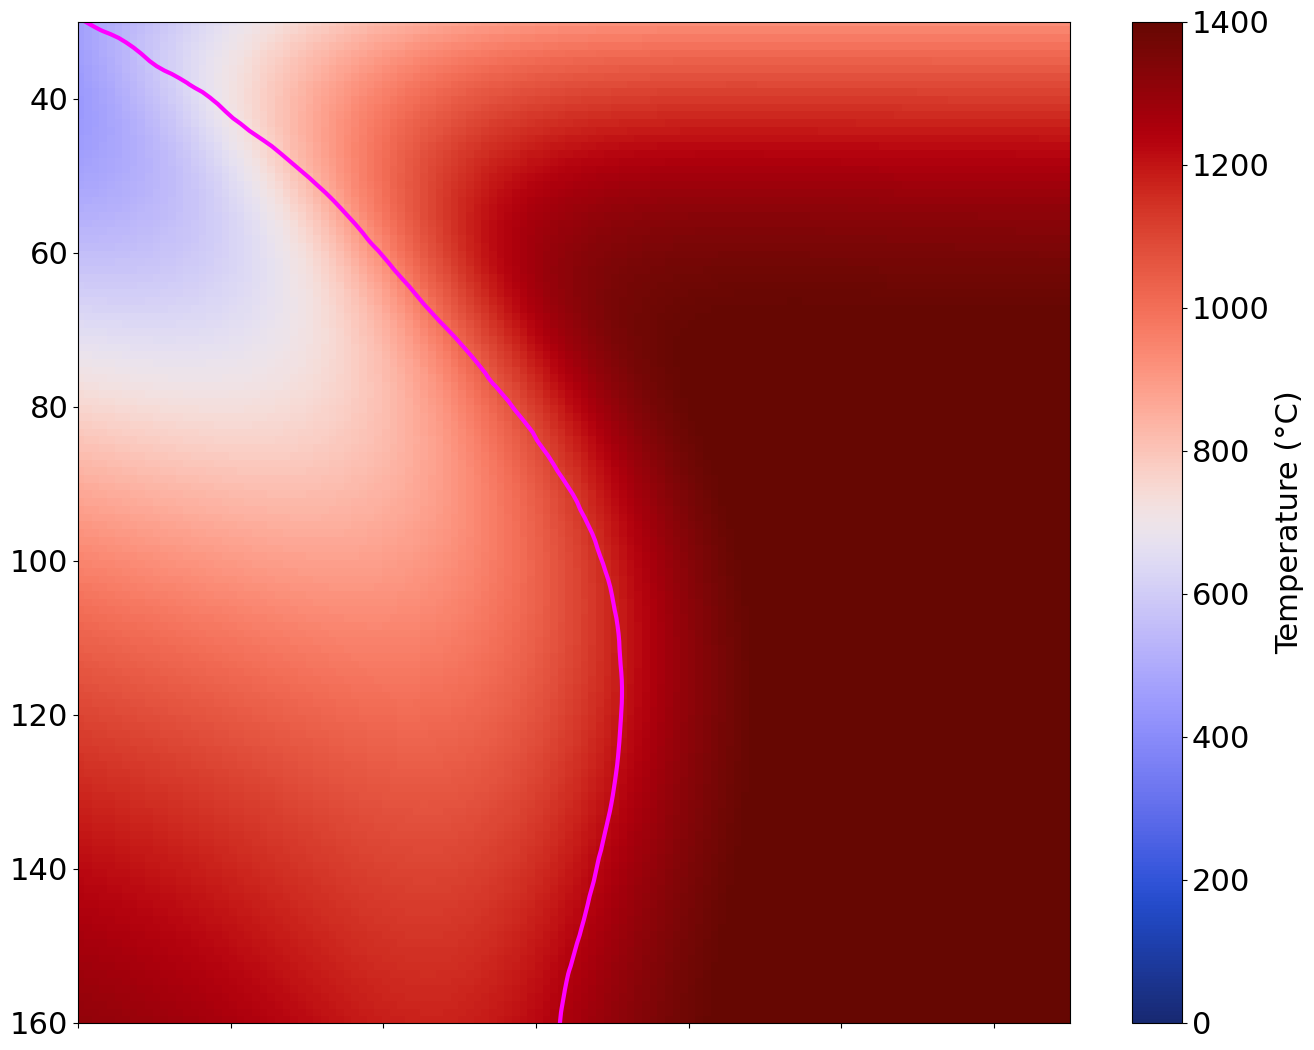

In [28]:
##Creates animations through time of slab properties with a moving X-axis. Approximately a 1:1 X:Y scale. For any new
##animation the colorbar must be reset both in terms of which one and in terms of range. 

fluxmap = pd.read_csv("fluxmap.cpt", header=None)
fluxmap=fluxmap.to_numpy()
fluxmap_2=np.zeros((64,4))
fluxmap_2[:,0:3]=fluxmap[:,0:3]
fluxmap_2[:,3]=1

norm_temp=plt.Normalize(0,1400)
cmap=cm.get_cmap('cet_diverging_bwr_20_95_c54')

from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
ageind=8

min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+130

label='time = {} Myr'                    ##allows for a resetting label with animation
sublab='convergence = {} cm/yr'         ##allows for a resetting sublabel with animation


norm=plt.Normalize(0,13)        ##range of values to be shaded with low values being a tranparent gray


fig, ax=plt.subplots(figsize=[16,13]) ##sets figure size, close to 1:1
ax.set_xlim(xstart,xend)
ax.set_ylim(160,30)
ax.axes.xaxis.set_ticklabels([])
x_data=wedge_mat[0,:,:,ageind]
y_data=wedge_mat[1,:,:,ageind]
z_data=wedge_mat[2,:,:,ageind]


t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm_temp)
fig.colorbar(t_plot, label='Temperature (\u00b0C)')
t_plot=ax.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=3)

#ax.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],160,color='white')

##animation function. Needs to redefine X,Y,Z data, X, Y axes and labels, and call the pcolormesh funtion every time
def animat(i):

    k=age[i,0]
    kk=convergence[i,0]
    
    min_ind=np.where(slab_mat[1,:,i]>=30)[0][0]-1
    xstart=m.floor(slab_mat[0,min_ind,i])
    xend=xstart+130
    
    x_data=wedge_mat[0,:,:,i]
    y_data=wedge_mat[1,:,:,i]
    z_data=wedge_mat[2,:,:,i]
    
    ax.clear()
    
    ax.set_xlim(xstart,xend)
    ax.set_ylim(160,30)
    fig.suptitle(label.format(k))
    ax.set_title(sublab.format(kk))
    ax.axes.xaxis.set_ticklabels([])
    ax.set_ylabel('depth (km)')
    t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm_temp)
    t_plot=ax.plot(slab_mat[0,:,i],slab_mat[1,:,i],c='magenta',lw=3)
    t_plot=ax.contour(x_data, y_data, z_data, levels=[700],colors='black',linewidths=2,linestyles='--',alpha=0.5)
    #ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i],slab_mat[1,:,i]+1,color='red')
    #ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i]+1,160,color='white')
    
    
    return t_plot,

anim = FuncAnimation(fig, func=animat, frames=np.arange(8,100), interval=200, repeat_delay=2000)


plt.show()
#anim.save("wedge_PT/forearc_thermal_fast_diverging.gif") #cannot see figure in notebook, need to save to gif.

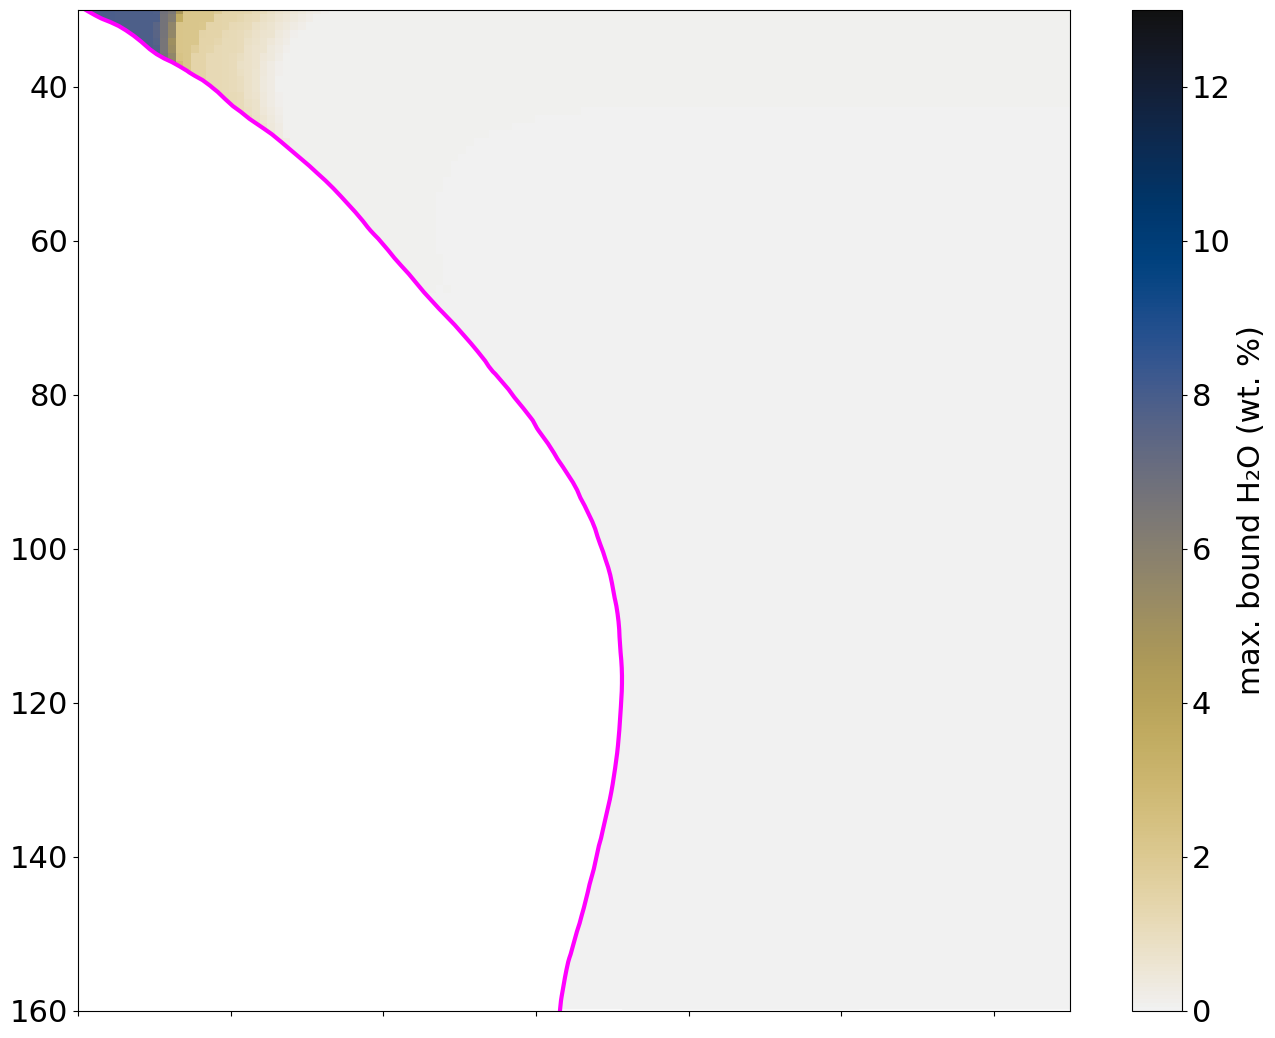

In [29]:
##Creates animations through time of slab properties with a moving X-axis. Approximately a 1:1 X:Y scale. For any new
##animation the colorbar must be reset both in terms of which one and in terms of range. 

cmap=cm.get_cmap('cet_linear_protanopic_deuteranopic_kbjyw_5_95_c25_r') 

from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 22})
ageind=8

min_ind=np.where(slab_mat[1,:,ageind]>=30)[0][0]-1
xstart=m.floor(slab_mat[0,min_ind,ageind])
xend=xstart+130

label='time = {} Myr'                    ##allows for a resetting label with animation
sublab='convergence = {} cm/yr'         ##allows for a resetting sublabel with animation


norm=plt.Normalize(0,13)        ##range of values to be shaded with low values being a tranparent gray


fig, ax=plt.subplots(figsize=[16,13]) ##sets figure size, close to 1:1
ax.set_xlim(xstart,xend)
ax.set_ylim(160,30)
ax.axes.xaxis.set_ticklabels([])
x_data=wedge_mat[0,:,:,ageind]
y_data=wedge_mat[1,:,:,ageind]
z_data=wedge_mat[4,:,:,ageind]


t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm)
fig.colorbar(t_plot, label='max. bound H\u2082O (wt. %)')
t_plot=ax.plot(slab_mat[0,:,ageind],slab_mat[1,:,ageind],c='magenta',lw=3)
ax.fill_between(slab_mat[0,:,ageind],slab_mat[1,:,ageind],160,color='white')

##animation function. Needs to redefine X,Y,Z data, X, Y axes and labels, and call the pcolormesh funtion every time
def animat(i):

    k=age[i,0]
    kk=convergence[i,0]
    
    min_ind=np.where(slab_mat[1,:,i]>=30)[0][0]-1
    xstart=m.floor(slab_mat[0,min_ind,i])
    xend=xstart+130
    
    x_data=wedge_mat[0,:,:,i]
    y_data=wedge_mat[1,:,:,i]
    z_data=wedge_mat[4,:,:,i]
    
    ax.clear()
    
    ax.set_xlim(xstart,xend)
    ax.set_ylim(160,30)
    fig.suptitle(label.format(k))
    ax.set_title(sublab.format(kk))
    ax.axes.xaxis.set_ticklabels([])
    ax.set_ylabel('depth (km)')
    t_plot=ax.pcolormesh(x_data, y_data, z_data, cmap=cmap, norm=norm)
    t_plot=ax.plot(slab_mat[0,:,i],slab_mat[1,:,i],c='magenta',lw=3)
    #ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i],slab_mat[1,:,i]+1,color='red')
    ax.fill_between(slab_mat[0,:,i],slab_mat[1,:,i],160,color='white')
    
    
    return t_plot,

anim = FuncAnimation(fig, func=animat, frames=np.arange(8,100), interval=200, repeat_delay=2000)


plt.show()
#anim.save("wedge_PT/forearc_redo.gif") #cannot see figure in notebook, need to save to gif.